In [8]:
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd

In [9]:
# def plot_accuracy(ansatz_data, dataset, model, ylim):
#     plt.figure(figsize=(10, 10))
#     for i, data in enumerate(ansatz_data):
#         x, y = zip(*data)
#         plt.plot(x, y, marker='o', label=f'Ansatz={i // 3}, r={i % 3 + 1}')
#     plt.title(f'{dataset} {model}-QNLNN Testing Accuracy Plot')
#     plt.xlabel('Ansatz Repetitions (D)')
#     plt.ylabel('Accuracy')
#     plt.grid(True)
#     plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#     plt.xticks([1, 2, 3])
#     plt.ylim(ylim, 1)  # Adjust the limits as needed
#     plt.savefig(f'./docs/accuracyplot_{dataset}_{model}_qnlnn', dpi=1000)
#     plt.show()

In [10]:
# # MNIST digit (0, 1) classification results
# a0_cnn_1 = [(1, 0.9993), (2, 0.9995), (3, 0.9994)]
# a0_cnn_2 = [(1, 0.9995), (2, 0.9995), (3, 0.9995)]
# a0_cnn_3 = [(1, 0.9991), (2, 0.9995), (3, 0.9999)]
# a0_pca_1 = [(1, 0.9868), (2, 0.9872), (3, 0.9877)]
# a0_pca_2 = [(1, 0.9852), (2, 0.9872), (3, 0.9863)]
# a0_pca_3 = [(1, 0.9887), (2, 0.9872), (3, 0.9877)]
#
# a1_cnn_1 = [(1, 0.9992), (2, 0.9993), (3, 0.9995)]
# a1_cnn_2 = [(1, 0.9994), (2, 0.9997), (3, 0.9995)]
# a1_cnn_3 = [(1, 0.9996), (2, 0.9997), (3, 0.9995)]
# a1_pca_1 = [(1, 0.9877), (2, 0.9948), (3, 0.9952)]
# a1_pca_2 = [(1, 0.9849), (2, 0.9938), (3, 0.9948)]
# a1_pca_3 = [(1, 0.9968), (2, 0.9943), (3, 0.9939)]
#
# a2_cnn_1 = [(1, 0.9991), (2, 0.9991), (3, 0.9995)]
# a2_cnn_2 = [(1, 0.9995), (2, 0.9995), (3, 0.9991)]
# a2_cnn_3 = [(1, 0.9995), (2, 0.9997), (3, 0.9999)]
# a2_pca_1 = [(1, 0.9872), (2, 0.9934), (3, 0.9934)]
# a2_pca_2 = [(1, 0.9882), (2, 0.9943), (3, 0.9970)]
# a2_pca_3 = [(1, 0.9887), (2, 0.9943), (3, 0.9816)]

In [11]:
# # Plot MNIST CNN data
# plot_accuracy([a0_cnn_1, a0_cnn_2, a0_cnn_3, a1_cnn_1, a1_cnn_2, a1_cnn_3, a2_cnn_1, a2_cnn_2, a2_cnn_3], dataset='MNIST', model='CNN', ylim=0.999)
# # Plot MNIST PCA data
# plot_accuracy([a0_pca_1, a0_pca_2, a0_pca_3, a1_pca_1, a1_pca_2, a1_pca_3, a2_pca_1, a2_pca_2, a2_pca_3], dataset='MNIST', model='PCA', ylim=0.98)

In [12]:
def plot_loss_convergence(directory, dataset, labels):
    file_pattern = os.path.join(directory, '*.csv')
    files = glob.glob(file_pattern)
    plt.figure(figsize=(10, 10))

    if not files:
        print(f"No CSV files found in directory: {directory}")
        return

    for idx, file in enumerate(files):
        try:
            df = pd.read_csv(file, delimiter=',')
            epochs = df['Epoch']
            train_loss = df['Train Loss']

            if not epochs.empty and not train_loss.empty:
                label = labels[idx] if idx < len(labels) else f"File {idx+1}"
                plt.plot(epochs, train_loss, label=label)
            else:
                print(f"No valid data found in file: {file}")

        except Exception as e:
            print(f"Error processing file {file}: {e}")

    plt.xlabel('Epoch')
    plt.ylabel('Training Loss')
    plt.title(f'{dataset} Training Loss Convergence Plot')
    plt.legend(loc='upper right')
    plt.grid(True)
    output_path = f'./docs/lossplot_{dataset}.png'
    plt.savefig(output_path, dpi=1000)
    plt.show()
    print(f"Plot saved to {output_path}")

In [15]:
def plot_accuracy_convergence(directory, dataset, labels):
    file_pattern = os.path.join(directory, '*.csv')
    files = glob.glob(file_pattern)
    plt.figure(figsize=(10, 10))

    if not files:
        print(f"No CSV files found in directory: {directory}")
        return

    for idx, file in enumerate(files):
        try:
            df = pd.read_csv(file)  # Assuming CSV is comma-separated
            epochs = df['Epoch']
            train_accuracy = df['Train Accuracy']
            test_accuracy = df['Test Accuracy']

            if not epochs.empty and not train_accuracy.empty and not test_accuracy.empty:
                label = labels[idx] if idx < len(labels) else f"File {idx+1}"
                plt.plot(epochs, train_accuracy, label=label)
            else:
                print(f"No valid data found in file: {file}")

        except pd.errors.ParserError as pe:
            print(f"ParserError: Error processing file {file}: {pe}")
        except Exception as e:
            print(f"Error processing file {file}: {e}")

    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(f'{dataset} Training Accuracy Plot')
    plt.legend(loc='lower right')
    plt.grid(True)
    output_path = f'./docs/accuracyplot_{dataset}.png'
    plt.savefig(output_path, dpi=1000)
    plt.show()
    print(f"Plot saved to {output_path}")

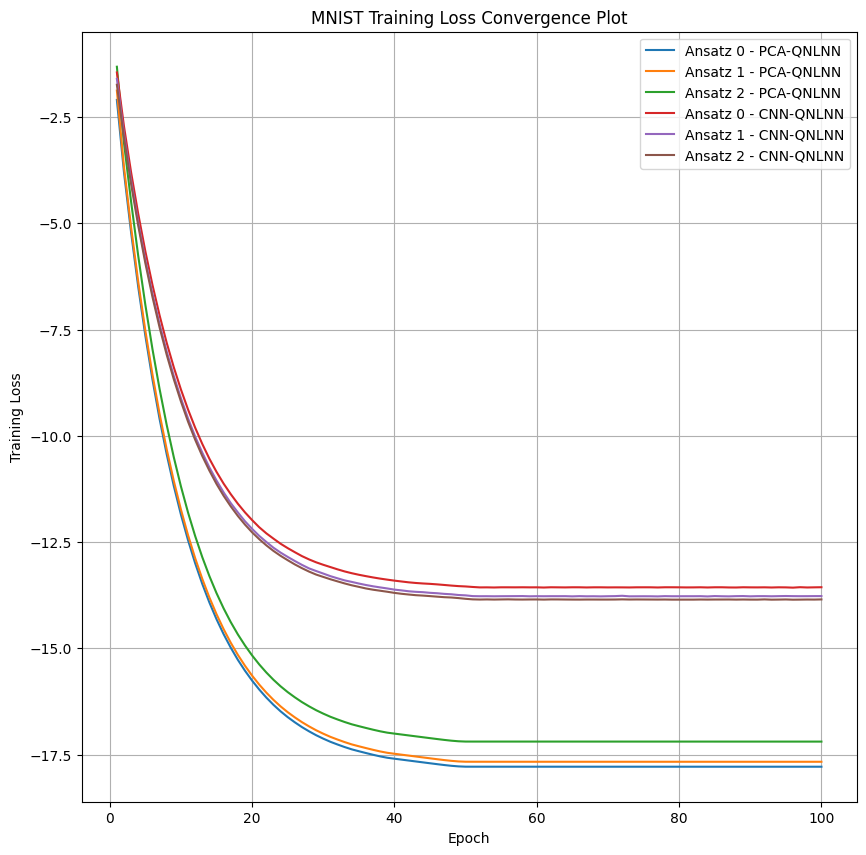

Plot saved to ./docs/lossplot_MNIST.png


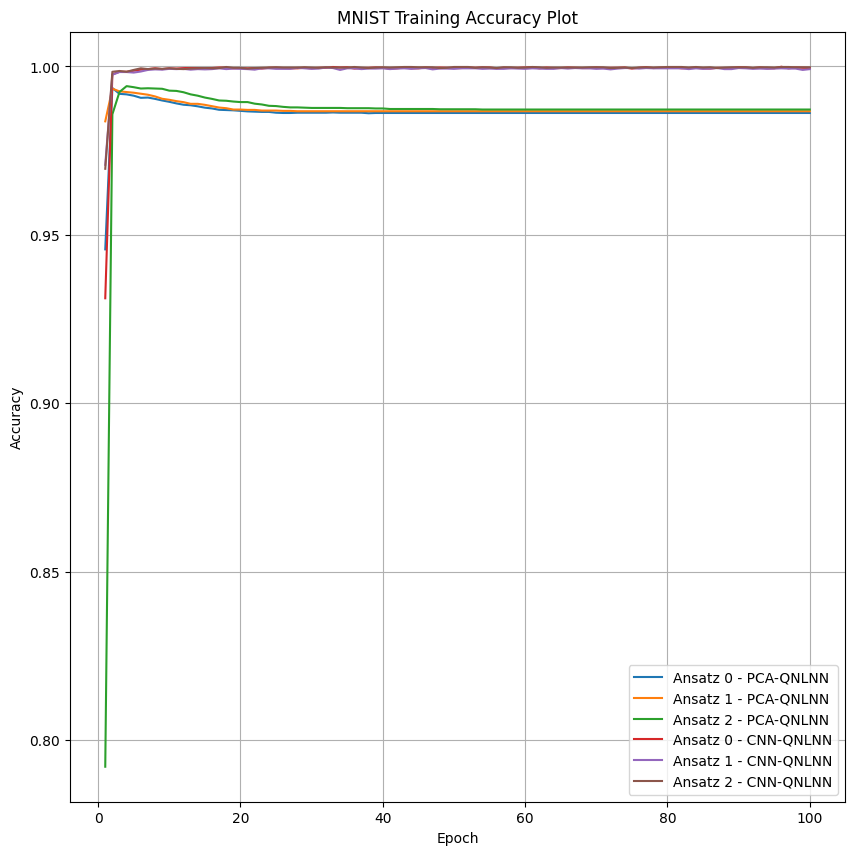

Plot saved to ./docs/accuracyplot_MNIST.png


In [17]:
mnist_dir = './mnist_digit_binaryclass/epoch_data/'
cifar10_dir = './cifar10_binaryclass/epoch_data/'
labels = ['Ansatz 0 - PCA-QNLNN', 'Ansatz 1 - PCA-QNLNN', 'Ansatz 2 - PCA-QNLNN',
          'Ansatz 0 - CNN-QNLNN', 'Ansatz 1 - CNN-QNLNN', 'Ansatz 2 - CNN-QNLNN']
plot_loss_convergence(mnist_dir, 'MNIST', labels=labels)
#plot_loss_convergence(cifar10_dir, 'MNIST', labels=labels)
plot_accuracy_convergence(mnist_dir, 'MNIST', labels=labels)
#plot_accuracy_convergence(cifar_dir, 'CIFAR-10', labels=labels)